In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Data Engineer

Desafio Técnico: GS Labs - Vaga Python - Ciência de Dados

Todo ano o Stack Overflow faz uma pesquisa com sua comunidade de desenvolvedores sobre vários temas, que vão desde as suas preferências tecnológicas até questões profissionais. Seu desafio é nos ajudar a responder algumas perguntas usando os resultados de uma destas pesquisas.



## Questões de Negócio
   * Responder algumas perguntas usando os resultados da pesquisa do Stack Overflow
   
&nbsp;
1. Você deve usar Python para ler esse arquivo, processá-lo de acordo com as regras de negócio descritas abaixo e depois inserir esses dados em um banco de dados PostgreSQL, após responder as questões abaixo será necessario colocar em um banco de dados.

    * Salário vazio ou com valor "NA" deve ser convertido para zero (0.0).
    
    &nbsp;
    * Salário deve ser sempre calculado em reais e mensal. Para esse cálculo você usará a coluna ConvertedSalary, que contém o salário anual. Considere que 1 dólar equivale a RS5,6.
    
    &nbsp;
    * O nome dos respondentes deve seguir a regra respondente_[número] . (ex: respondente_1, respondente_2, respondente_3). O critério de geração desse número é todo seu.
    
    &nbsp;
    * Cada linha da tabela linguagem_programacao deve conter uma única linguagem de programação.
    
    &nbsp;
    * Cada linha da tabela ferramenta_comunic deve conter apenas uma ferramenta de comunicação.
    
    &nbsp;
    * É importante notar que em alguns campos de respostas existem múltiplos resultados, como por exemplo na coluna LanguageWorkedWith, que contém várias linguagens de programação em uma linha. Nestes casos, você deve quebrar a string nos pontos que existem ponto-e-vírgula (";").
    
&nbsp;


2. Realizar consultas no banco de dados para responder as perguntas:

    * Qual a quantidade de respondentes de cada país?
    
    &nbsp;
    * Quantos usuários que moram em "United States" gostam de Windows?
    
    &nbsp;
    * Qual a média de salário dos usuários que moram em Israel e gostam de Linux?
    
    &nbsp;
    * Qual a média e o desvio padrão do salário dos usuários que usam Slack para cada tamanho de empresa disponível?
    
    
     
    


In [2]:
# Importações de pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregando dataset
data = pd.read_csv('datasets/base_de_respostas_10k_amostra.csv')

# Formatação das casas decimal
pd.set_option('display.float_format', lambda x: '%.3f' % x)  

In [4]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,101346,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",100 to 499 employees,Back-end developer,...,Daily or almost every day,Female,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,45 - 54 years old,Yes,No,The survey was an appropriate length,Somewhat easy
1,44791,Yes,No,Germany,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Desktop or enterprise appli...,...,3 - 4 times per week,Male,Straight or heterosexual,"Other doctoral degree (Ph.D, Ed.D., etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was too long,Neither easy nor difficult
2,32306,Yes,Yes,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,1 - 2 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,25 - 34 years old,No,No,The survey was an appropriate length,Somewhat easy
3,37142,Yes,No,United States,"Yes, full-time",Employed part-time,"Secondary school (e.g. American high school, G...",NaN,10 to 19 employees,Front-end developer;QA or test developer;Student,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Hispanic or Latino/Latina;White or of European...,18 - 24 years old,No,No,The survey was an appropriate length,Very easy
4,21745,Yes,Yes,Nepal,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Designer;Desktop or enterpr...,...,1 - 2 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",South Asian,18 - 24 years old,No,NaN,The survey was too long,Somewhat easy


In [5]:
list(data)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [6]:
# Número de linhas e colunas
data.shape

(10000, 129)

In [7]:
print(data.describe())

       Respondent  AssessJob1  AssessJob2  AssessJob3  AssessJob4  AssessJob5  \
count   10000.000    8053.000    8053.000    8053.000    8053.000    8053.000   
mean    50621.383       6.464       6.728       5.906       4.062       3.787   
std     29391.305       2.779       2.515       2.626       2.523       2.444   
min        12.000       1.000       1.000       1.000       1.000       1.000   
25%     24971.750       4.000       5.000       4.000       2.000       2.000   
50%     50979.000       7.000       7.000       6.000       4.000       3.000   
75%     75899.750       9.000       9.000       8.000       6.000       5.000   
max    101581.000      10.000      10.000      10.000      10.000      10.000   

       AssessJob6  AssessJob7  AssessJob8  AssessJob9  ...  \
count    8053.000    8053.000    8053.000    8053.000  ...   
mean        4.335       5.689       4.222       7.692  ...   
std         2.492       2.896       2.477       2.383  ...   
min         1.000     

In [8]:
# Verificando se há duplicidade
data = data.drop_duplicates(subset='Respondent')

In [9]:
# Retirando caractere ','
data.Salary = [str(x).replace(",", "") for x in data.Salary]

In [10]:
#Convertendo a coluna de object para float
data['Salary'] = data['Salary'].astype('float64')
data['Salary'].dtypes

dtype('float64')

### 1- Salário vazio ou com valor "NA" deve ser convertido para zero (0.0).

In [11]:
# Convertendo os valores NaN em 0 nas colunas Salary, SalaryType e ConvertedSalary
data['Salary'].fillna(0.0, inplace=True)
data['ConvertedSalary'].fillna(0.0, inplace=True)

In [12]:
data[['Salary','SalaryType', 'ConvertedSalary']]

,Salary,SalaryType,ConvertedSalary
0,50000.000,NaN,50000.000
1,65000.000,Yearly,79552.000
2,125000.000,NaN,125000.000
3,0.000,NaN,0.000
4,0.000,NaN,0.000
...,...,...,...
9995,0.000,Monthly,0.000
9996,100000.000,Yearly,138904.000
9997,36000.000,Yearly,50005.000
9998,0.000,NaN,0.000


### 2- Salário deve ser sempre calculado em reais e mensal. Para esse cálculo você usará a coluna ConvertedSalary, que contém o salário anual. Considere que 1 dólar equivale a R$5,6.


In [13]:
# Convertendo em reais coluna ConvertdSalary
data['ConvertedSalary'] = data['ConvertedSalary'] * 5.60 
data['ConvertedSalary']

0      280000.000
1      445491.200
2      700000.000
3           0.000
4           0.000
          ...    
9995        0.000
9996   777862.400
9997   280028.000
9998        0.000
9999   298138.400
Name: ConvertedSalary, Length: 10000, dtype: float64

In [14]:
# Convertendo coluna Salary usando os valores da coluna ConvertedSalary atualizando para reais
data['Salary'] = data['ConvertedSalary']/12
data['Salary']

0      23333.333
1      37124.267
2      58333.333
3          0.000
4          0.000
          ...   
9995       0.000
9996   64821.867
9997   23335.667
9998       0.000
9999   24844.867
Name: Salary, Length: 10000, dtype: float64

### 3- O nome dos respondentes deve seguir a regra respondente_[número], (ex: respondente_1, respondente_2, respondente_3).  O critério de geração desse número é todo seu.

In [15]:
# Usando list Comprehensins para mudar os valores da coluna conforme solicitado
data['Respondent'] = [f'Respondente_{x}' for x in range(1,len(data)+1)]  
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,Respondente_1,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",100 to 499 employees,Back-end developer,...,Daily or almost every day,Female,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,45 - 54 years old,Yes,No,The survey was an appropriate length,Somewhat easy
1,Respondente_2,Yes,No,Germany,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Desktop or enterprise appli...,...,3 - 4 times per week,Male,Straight or heterosexual,"Other doctoral degree (Ph.D, Ed.D., etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was too long,Neither easy nor difficult
2,Respondente_3,Yes,Yes,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,1 - 2 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,25 - 34 years old,No,No,The survey was an appropriate length,Somewhat easy
3,Respondente_4,Yes,No,United States,"Yes, full-time",Employed part-time,"Secondary school (e.g. American high school, G...",NaN,10 to 19 employees,Front-end developer;QA or test developer;Student,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Hispanic or Latino/Latina;White or of European...,18 - 24 years old,No,No,The survey was an appropriate length,Very easy
4,Respondente_5,Yes,Yes,Nepal,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Designer;Desktop or enterpr...,...,1 - 2 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",South Asian,18 - 24 years old,No,NaN,The survey was too long,Somewhat easy


### 4- Cada linha da tabela linguagem_programacao deve conter uma única linguagem de programação

In [16]:
# Visualizando os dados da coluna LanguageWorkedWith
data['LanguageWorkedWith']

0                              C#;JavaScript;SQL;HTML;CSS
1                      C;C++;Java;JavaScript;SQL;HTML;CSS
2       Assembly;C;C++;C#;Java;JavaScript;PHP;SQL;Type...
3          C++;Java;JavaScript;Python;HTML;CSS;Bash/Shell
4           C;C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS
                              ...                        
9995                                                 Java
9996                           C#;JavaScript;SQL;HTML;CSS
9997                  Matlab;Perl;Python;R;VBA;Bash/Shell
9998                                                  NaN
9999                                               C;Java
Name: LanguageWorkedWith, Length: 10000, dtype: object

In [17]:
# Usando função split para quebrar string a partir do ';'
data['LanguageWorkedWith'] = [str(x).split(';')[0] for x in data.LanguageWorkedWith]
data['LanguageWorkedWith']

0             C#
1              C
2       Assembly
3            C++
4              C
          ...   
9995        Java
9996          C#
9997      Matlab
9998         nan
9999           C
Name: LanguageWorkedWith, Length: 10000, dtype: object

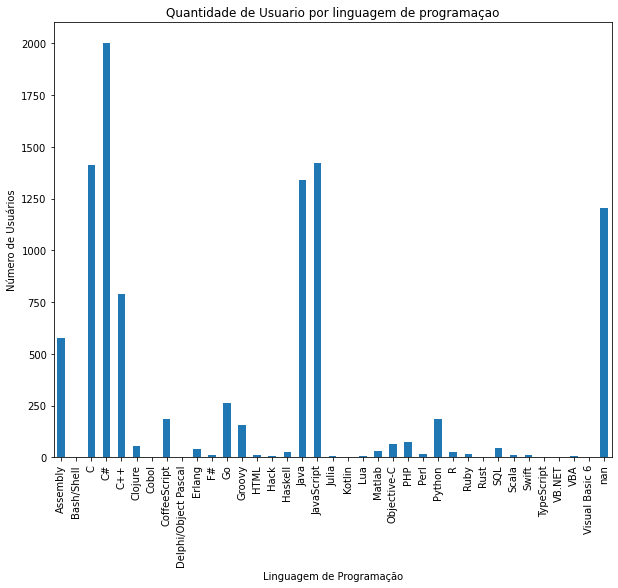

In [18]:
# grafico com o agrupamento dos valores 
df = data.groupby('LanguageWorkedWith').size()
df.plot.bar(xlabel= 'Linguagem de Programação', ylabel='Número de Usuários', figsize=(10,8)).set_title('Quantidade de Usuario por linguagem de programaçao');

### 5- Cada linha da tabela ferramenta_comunic deve conter apenas uma ferramenta de comunicação.

In [19]:
# Visualizando os dados da coluna CommunicationTools
data['CommunicationTools']

0                                                   Slack
1       Jira;Other wiki tool (Github, Google Sites, pr...
2       Office / productivity suite (Microsoft Office,...
3                                            Slack;Trello
4                                            Slack;Trello
                              ...                        
9995                   Facebook;Stack Overflow Enterprise
9996    Confluence;Google Hangouts/Chat;Jira;Office / ...
9997              Confluence;Google Hangouts/Chat;HipChat
9998                                                  NaN
9999    Confluence;Office / productivity suite (Micros...
Name: CommunicationTools, Length: 10000, dtype: object

In [20]:
# Convertendo caracteres 
data['CommunicationTools'] = [str(x).replace("(", ";") for x in data.CommunicationTools]

# Usando função split para quebrar string a partir do ';' e retornar uma unica ferramenta de comunicação
data['CommunicationTools'] = [str(x).split(';')[0] for x in data.CommunicationTools]
data['CommunicationTools']

0                              Slack
1                               Jira
2       Office / productivity suite 
3                              Slack
4                              Slack
                    ...             
9995                        Facebook
9996                      Confluence
9997                      Confluence
9998                             nan
9999                      Confluence
Name: CommunicationTools, Length: 10000, dtype: object

In [21]:
# Retornando valores agrupados
data.groupby('CommunicationTools').size()

CommunicationTools
Confluence                      2245
Facebook                         486
Google Hangouts/Chat             986
HipChat                          101
Jira                             839
Office / productivity suite     1176
Other chat system                278
Other wiki tool                  115
Slack                            896
Stack Overflow Enterprise         24
Trello                            84
nan                             2770
dtype: int64

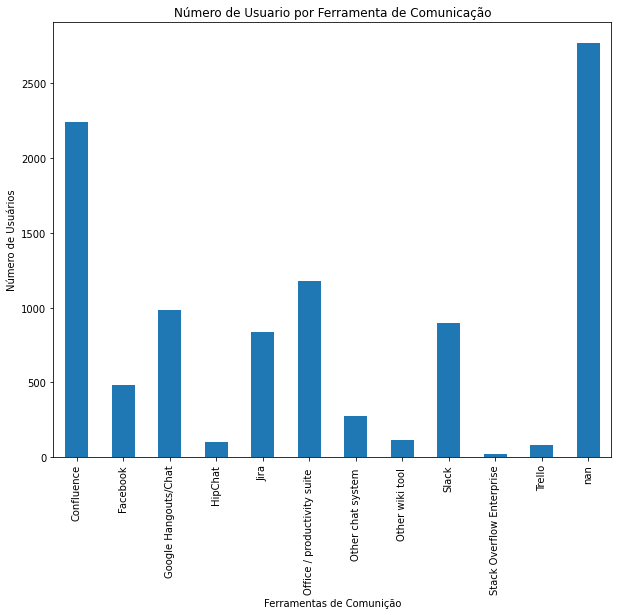

In [22]:
# Grafico com valores agrupados
df1 = data.groupby('CommunicationTools').size()
df1.plot.bar(xlabel= 'Ferramentas de Comunição', ylabel='Número de Usuários', figsize=(10,8)).set_title('Número de Usuario por Ferramenta de Comunicação');


### 1- Qual a quantidade de respondentes de cada país?

In [23]:
# Retornar os valores de respondentes por cada pais 
data_country = data[['Respondent','Country']].groupby('Country').size().sort_values(ascending=True)

# Expressão deixa o display sem valor para impressão na qual vai apresentar todos os resultados
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(data_country)

Country
Cameroon                                        1
Honduras                                        1
Fiji                                            1
Iraq                                            1
Jamaica                                         1
Kuwait                                          1
Congo, Republic of the...                       1
Mozambique                                      1
Myanmar                                         1
Namibia                                         1
Oman                                            1
Botswana                                        1
Ghana                                           1
Turkmenistan                                    1
Senegal                                         1
Togo                                            1
Bahrain                                         1
Angola                                          1
Solomon Islands                                 1
Sudan                                     

### 2- Quantos usuários que moram em "United States" gostam de Windows?

In [24]:
# Verificando os valores por OperatingSystem
data.groupby('OperatingSystem').size()

OperatingSystem
BSD/Unix         17
Linux-based    1892
MacOS          2496
Windows        4215
dtype: int64

In [25]:
# Usando o groupby para retornar o valor de usuarios de windows nos Estados Unidos usando expressão booleana
len(data.query('Country == "United States" & OperatingSystem == "Windows"'))

961

### 3- Qual a média de salário dos usuários que moram em Israel e gostam de Linux?

In [26]:
# Usando loc para retornar todos os usuarios que moram em Israel e usam Linux
data.loc[(data['Country'] == 'Israel') & (data['OperatingSystem'] == 'Linux-based')]['Salary'].mean()

28335.336842105266

### 4- Qual a média e o desvio padrão do salário dos usuários que usam Slack para cada tamanho de empresa disponível?

In [27]:
# Explorando valores da coluna CompanySize
data.groupby('CompanySize').size().sort_values(ascending=True)

CompanySize
5,000 to 9,999 employees     331
500 to 999 employees         489
Fewer than 10 employees      801
10 to 19 employees           812
1,000 to 4,999 employees     889
10,000 or more employees    1065
100 to 499 employees        1549
20 to 99 employees          1916
dtype: int64

In [28]:
# Usando query para retornar o salario de cada funcionario que usar Slack pelo tamanho da empresa
data.query('CommunicationTools == "Slack"').groupby('CompanySize')['Salary'].describe().reset_index()

,CompanySize,count,mean,std,min,25%,50%,75%,max
0,"1,000 to 4,999 employees",54.000,36653.685,47930.416,0.000,13615.700,28297.033,42700.000,336000.000
1,10 to 19 employees,143.000,32468.908,92925.268,0.000,5345.200,16150.400,32610.900,933333.333
2,"10,000 or more employees",56.000,40878.875,70185.559,0.000,13641.250,29420.767,44333.333,466666.667
3,100 to 499 employees,121.000,40274.710,92023.268,0.000,11967.200,23988.067,42000.000,933333.333
4,20 to 99 employees,207.000,45347.952,89924.527,0.000,6389.600,20563.200,38113.133,466666.667
5,"5,000 to 9,999 employees",21.000,84287.578,198288.800,0.000,19990.133,25701.667,56526.400,933333.333
6,500 to 999 employees,36.000,26980.774,17951.131,0.000,13559.000,27970.133,35583.333,77000.000
7,Fewer than 10 employees,131.000,28272.291,54406.765,0.000,5653.200,16205.467,33127.733,408738.400


In [29]:
# Exportando um arquivo menor com as colunas a serem usadas no banco de dados 

In [30]:
# df = data[['Respondent', 'OpenSource', 'Hobby', 'ConvertedSalary', 'CommunicationTools', 'LanguageWorkedWith', 'OperatingSystem', 'CompanySize', 'Country']]

In [31]:
df.to_csv('base_amostra_10k.csv', sep=',', index=False)

In [32]:
data_df = pd.read_csv('carga_db.csv')

In [33]:
data_df.head()

,Respondent,OpenSource,Hobby,ConvertedSalary,CommunicationTools,LanguageWorkedWith,OperatingSystem,CompanySize,Country
0,Respondente_1,No,No,280000.000,Slack,C#,Windows,100 to 499 employees,United States
1,Respondente_2,No,Yes,445491.200,Jira,C,Windows,"1,000 to 4,999 employees",Germany
2,Respondente_3,Yes,Yes,700000.000,Office / productivity suite,Assembly,Windows,"10,000 or more employees",United States
3,Respondente_4,No,Yes,0.000,Slack,C++,MacOS,10 to 19 employees,United States
4,Respondente_5,Yes,Yes,0.000,Slack,C,Windows,20 to 99 employees,Nepal
